<a href="https://colab.research.google.com/github/CMunoz-28/DataAnalytics/blob/main/Customer_Segmentation_Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Marketing Analytics & Statistical Analysis

##Exploratory Data Analysis (EDA) - Customer Segmentation Pt.2

###Perform Exploratory Data Analysis on dataset Mall Customer data

###Dataset:https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python


The following data analysis, part two of our ongoing series, will concentrate on an in-depth examination of gender distribution. This phase aims to uncover insights and patterns related to gender demographics (e.g., Age, Income, and Spending) within our dataset, providing a comprehensive understanding of how gender variables influence the overall data landscape. We hope to shed light on potential disparities, trends, and implications critical for informed decision-making and strategic planning by delving into these aspects.

Customer segmentation is the ideal methodology whenever you need to find your best customer.,

Companies can identify segments of customers that share a similarity in various ways relevant to marketing, such as gender, age, interests, and miscellaneous spending habits. This will allow them to target the potential user base.
* In this Project, we will perform one of the most essential applications of machine learning – Customer Segmentation, and execute customer segmentation in Python.

#Libraries, Directory, Data


By exploring the data, our data consists of one .csv file containing the following features that describe each customer:

* CustomerIDs
* Age
* Gender
* Annual Income
* Spending Score

In [31]:
%cd /content/drive/MyDrive/Projects/Analytics/Customer Segmentation

/content/drive/MyDrive/Projects/Analytics/Customer Segmentation


In [32]:
#Install needed Libraries
#Install needed Libraries
import numpy as np
from scipy.stats import iqr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px

In [33]:
#Load the data
customer_df = pd.read_csv('Mall_Customers.csv')
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#Check for missing data

In [34]:
customer_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#Describe the data

In [35]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [36]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
customer_df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [38]:
customer_df.shape

(200, 5)

#Exploratory Data Analysis

##Gender
In this, we will create a barplot and a piechart to show the gender distribution across our customers dataset.

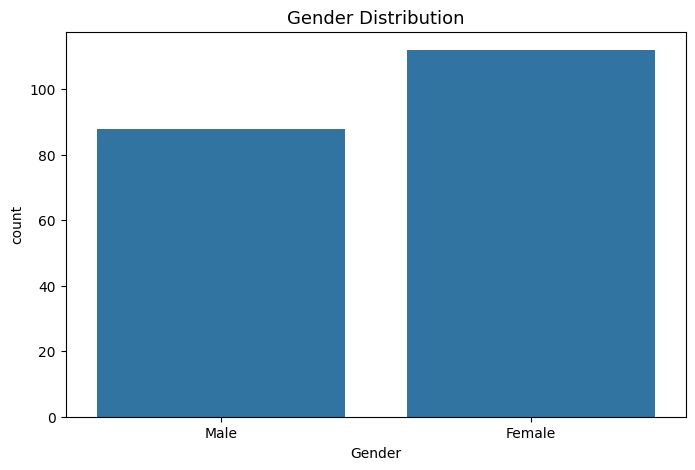

In [39]:
plt.figure(figsize=(8,5))
plt.title('Gender Distribution', fontsize=13)
sns.countplot(x='Gender',data = customer_df)
plt.show()

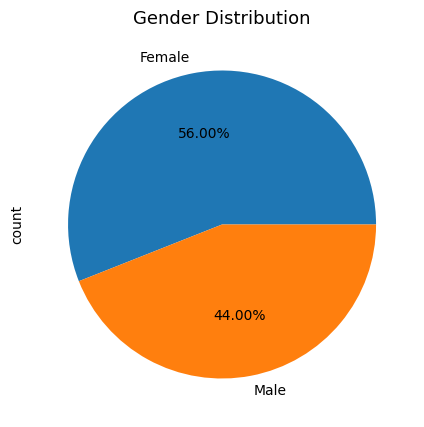

In [40]:
plt.figure(figsize=(8,5))
plt.title('Gender Distribution', fontsize=13)
customer_df.Gender.value_counts().plot.pie( autopct='%.2f%%')
plt.show()

From the above graph, we conclude that the percentage of female is 56%, whereas the percentage of male in our customer dataset is 44%.

##Age

Next, we analyze the age feature; it's a continuous variable. Thus, we will plot a histogram to view the distribution of customer ages. We will first proceed by reviewing this variable.

In [41]:
customer_df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

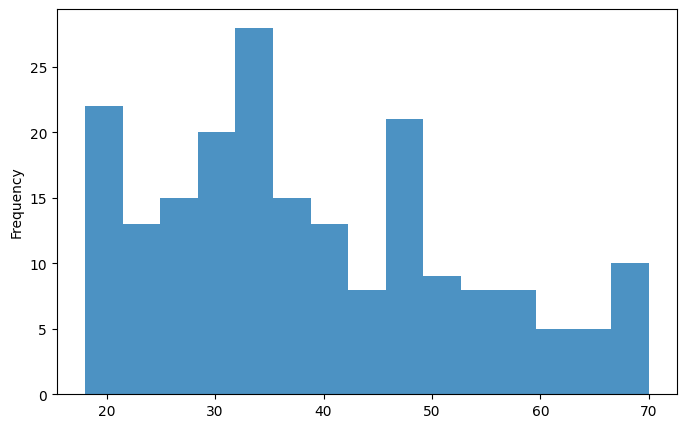

In [42]:
plt.figure(figsize=(8,5))
customer_df.Age.plot.hist(bins=15,alpha=.8)
plt.show()

<Axes: xlabel='Age'>

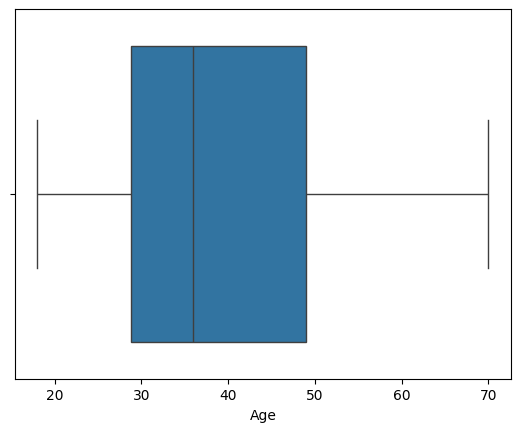

In [43]:
sns.boxplot(x='Age',data=customer_df)

From the above graphs, most customers are between 30 and 35. Also, the minimum age of customers is 18, whereas the maximum is 70.

##Annual Income

Now we will explore the annual income feature using a histogram and a density plots to get insights from this feature.

In [44]:
customer_df['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

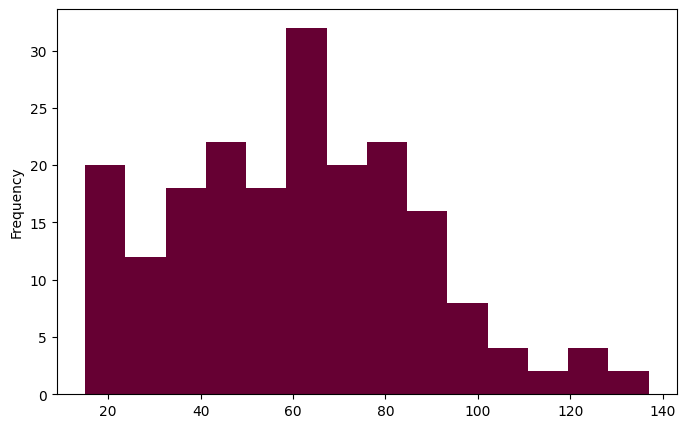

In [45]:
plt.figure(figsize=(8,5))
customer_df['Annual Income (k$)'].plot.hist(bins=14,color="#660033")
plt.show()

<ipython-input-46-e8ebe0b88f25>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(customer_df['Annual Income (k$)'], color="blue", shade=True)


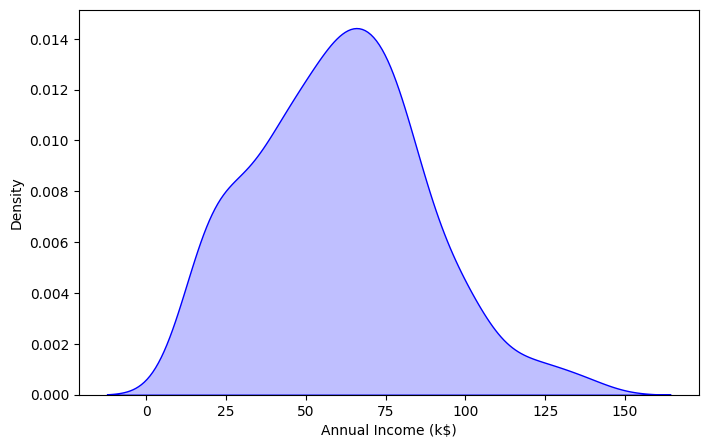

In [46]:
plt.figure(figsize=(8,5))
sns.kdeplot(customer_df['Annual Income (k$)'], color="blue", shade=True)
plt.show()

From the above graphs, we can clearly see that the customers' minimum annual income is 15 while their maximum income is 137. People earning an average income of 70 have the highest frequency count in our histogram distribution. The average income of all the customers is 60.56. The Kernel Density Plot we displayed above shows that the annual income is average.

##Spending Score

In the same way, we will analyse the spending score feature.

In [47]:
customer_df['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

<ipython-input-48-b73e7d274ba0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer_df['Spending Score (1-100)'])


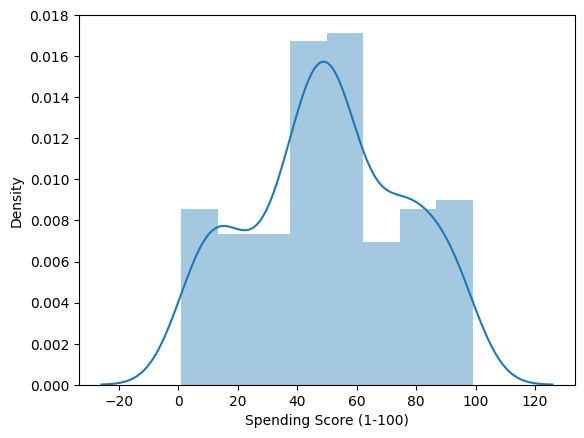

In [48]:
sns.distplot(customer_df['Spending Score (1-100)'])
plt.show()

The minimum spending score is one, the maximum is 99, and the average is 50.20. From the distribution plot, the customers with a spending score between 40 and 50 have the highest frequency among all classes.

##The Elbow Method

In [49]:
customer_df["Annual Income (k$)"].fillna(customer_df["Annual Income (k$)"].median(), inplace=True)
data = customer_df[["Annual Income (k$)", "Spending Score (1-100)"]]
df_log = np.log(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

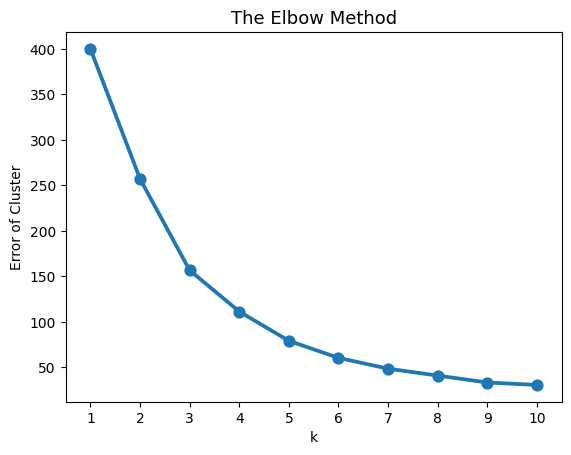

In [50]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

plt.title('The Elbow Method', fontsize = '13')
plt.xlabel('k'); plt.ylabel('Error of Cluster')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.show()